In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import hsv_to_rgb

In [2]:
def bisection_convergence(f, oots, width, height, cx, cy, mnx, mxx, mny, mxy, niter, zoom):
    
    pixels = np.arange(width*height*3, dtype=np.float32).reshape(height, width, 3)

    eps = 1e-3
    
    for y in range(height):
        zy = cy + map(y, 0, height, mny*zoom, mxy*zoom)

        for x in range(width):            
            zx = cy + map(x, 0, width, mnx*zoom, mxx*zoom)

            a = zy
            b = zx
            c = a
            
            count = 0
            
            while b-a >= eps and f(a) * f(b) <= 0:
                
                if f(a) == 0.0:
                    c = a
                    break
                    
                if f(b) == 0.0:
                    c = b
                    break
                     
                c = (a + b) / 2
                
                if f(c) * f(a) < 0:
                    b = c
                else:
                    a = c
                
                count += 1
                
                if count > niter:
                    break
                    
            
            c_root = False
                
            for j, root in enumerate(roots):
                    cMap = map(count, 0, niter, 1, 0.5)
                    
                    if abs(c - root) < eps:
                        c_root = True
                        pixels[height-x-1,y] = hsv_to_rgb((
                            map(j, 0, len(roots), 0, 1) * cMap, 
                            cMap,
                            map(j, 0, len(roots), 1, 0) * cMap 
                        ))
                        
            if not c_root:
                if b < a:
                    pixels[height-x-1,y] = (1, 1, 0)
                elif f(a) * f(b) >= 0:
                    pixels[height-x-1,y] = (1, 1, 1)
                else:
                    pixels[height-x-1,y] = (0, 0, 0)
                    
                    
    return pixels

def ds(f, roots, name,
       width = 320, height = 320,
       cx = 0, cy = 0, mnx = -8.0, 
       mxx = 8.0, mny = -8.0, mxy = 8.0, 
       niter = 1e4, zoom = 1):

    pimg = bisection_convergence(f, roots, width, height, cx, cy, mnx, mxx, mny, mxy, niter, zoom)
    
    plt.title('bisection_convergence ' + name)
    
    plt.xlabel("a in "
               + "("
               + str(cx + map(0, 0, width, mnx*zoom, mxx*zoom))
               + ","
               + str(cx + map(width, 0, width, mnx*zoom, mxx*zoom))
               + ")"
              )
    
    plt.ylabel("b in"
               + "("
               + str(cy + map(0, 0, height, mny*zoom, mxy*zoom))
               + ","
               + str(cy + map(height, 0, height, mny*zoom, mxy*zoom)) 
               + ")")
    
    extent = mnx, mxx, mny, mxy
    plt.imshow(pimg, extent = extent)
    plt.show()

def map(value, istart, istop, ostart, ostop):
    return ostart + (ostop - ostart) * ((value - istart) / (istop - istart))

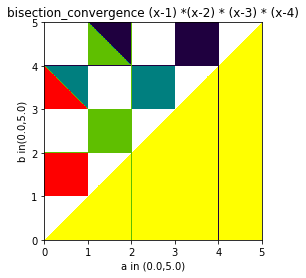

In [3]:
def f(x): 
    return (x-1) *(x-2) * (x-3) * (x-4)

roots = [1, 2, 3, 4]

ds(f, roots, "(x-1) *(x-2) * (x-3) * (x-4)", 
   zoom = 1, mnx = 0, mxx = 5, mny = 0, mxy = 5)